In [1]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import pickle

In [2]:
mG = 2.0
T = 0.2

In [3]:
Grange = linspace(4, 6, 5)[:]

In [4]:
erange = loadtxt('output/Param_G=5.50MG=1.80/erange_T=0.200.dat')

In [5]:
lss =['-', '--', ':', '-.']

In [6]:
mGs = [2.0, 1.8, 1.6, 1.4]

In [7]:
import matplotlib
matplotlib.style.use('publication')

In [8]:
import labellines

## Plot the resonance masses

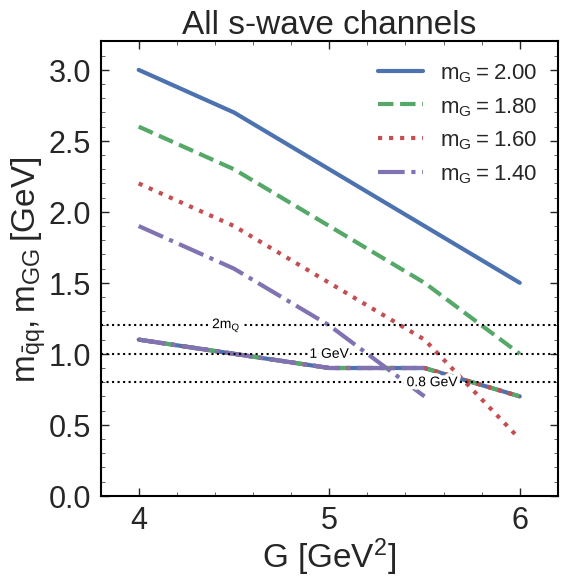

In [9]:
for mG, ls in zip(mGs, lss):
    Grange = linspace(4, 6, 5)[:]
    if mG == 1.4:
        Grange = linspace(4, 6, 5)[:-1]
    ch_qa1 = [loadtxt('output/Param_G=%.2fMG=%.2f/'%(G, mG) + 'Q_TM_qa1_T=%.3f.dat'%T, dtype=complex) for G in Grange]
    ch_gg1 = [loadtxt('output/Param_G=%.2fMG=%.2f/'%(G, mG) + 'G_TM_gg1_T=%.3f.dat'%T, dtype=complex) for G in Grange]

    m_mess = []

    for ch in ch_qa1:
        i_max = argmin(imag(ch[:, 0]))
        m_mess += [erange[i_max]]

    m_gb = []

    for ch in ch_gg1:
        i_max = argmin(imag(ch[:, 0]))
        m_gb += [erange[i_max]]

    l, = plt.plot(Grange, m_mess, ls=ls, label=r'$m_G = %.2f$'%mG)
    plt.plot(Grange, m_gb, c=l.get_c(), ls=ls)
plt.legend(fontsize=16)
plt.xlim(3.8, 6.2)
plt.ylim(0, 3.2)

lines = [plt.axhline(1.2, ls=':', lw=1.5, label=r'$2 m_Q$', c='black')]
lines += [plt.axhline(1.0, ls=':', lw=1.5, label=r'1 GeV', c='black')]

lines += [plt.axhline(0.8, ls=':', lw=1.5, label=r'0.8 GeV', c='black')]
labellines.labelLines(lines)

plt.xlabel('G [GeV$^{2}]$')
plt.ylabel(r'$m_{\bar q q}, m_{GG} \, [GeV]$')

plt.title('All s-wave channels')
Grange = linspace(4, 6, 5)[:]

## Plot the SF and sigma

In [10]:
mG = 1.6

In [11]:
S_Q = [loadtxt('output/Param_G=%.2fMG=%.2f/'%(G, mG) + 'Q_S_T=%.3f.dat'%T, dtype=complex) for G in Grange]
S_G = [loadtxt('output/Param_G=%.2fMG=%.2f/'%(G, mG) + 'G_S_T=%.3f.dat'%T, dtype=complex) for G in Grange]

R_Q = [loadtxt('output/Param_G=%.2fMG=%.2f/'%(G, mG) + 'Q_Rho_T=%.3f.dat'%T, dtype=complex) for G in Grange]
R_G = [loadtxt('output/Param_G=%.2fMG=%.2f/'%(G, mG) + 'G_Rho_T=%.3f.dat'%T, dtype=complex) for G in Grange]

In [12]:
lss = ['-', '--', '-.', ':', (0, (3, 1, 1, 1, 1, 1))]

Text(0.5, 1.0, '$\\Sigma_Q$')

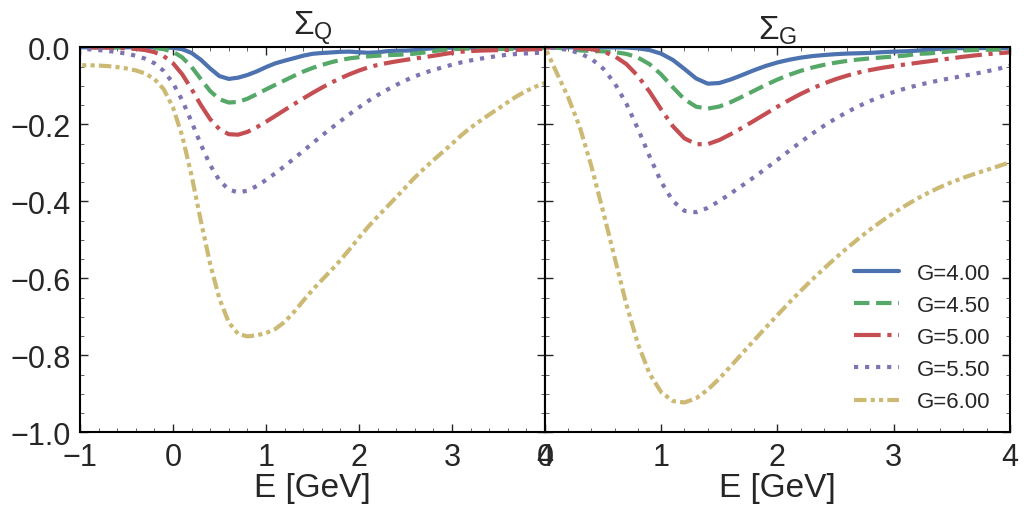

In [13]:
fig, ax = plt.subplots(1,2,figsize=(12,5), sharey='all')
fig.subplots_adjust(wspace=0)
for G, sq, sg, ls in zip(Grange, S_Q, S_G, lss):
    l, = ax[0].plot(erange, imag(sq[:, 0]), label='G=%.2f'%G, ls=ls)
    ax[1].plot(erange, imag(sg[:, 0]), label='G=%.2f'%G, ls=ls)
    
    
ax[0].set_xlim(-1, 4)
ax[1].set_xlim(0, 4)
for _ in ax:
    _.set_xlabel('E [GeV]')
plt.legend(fontsize=16)
ax[0].set_ylim(-1, 0)

ax[1].set_title(r'$\Sigma_G$')
ax[0].set_title(r'$\Sigma_Q$')

/usr/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, '$\\rho_Q$')

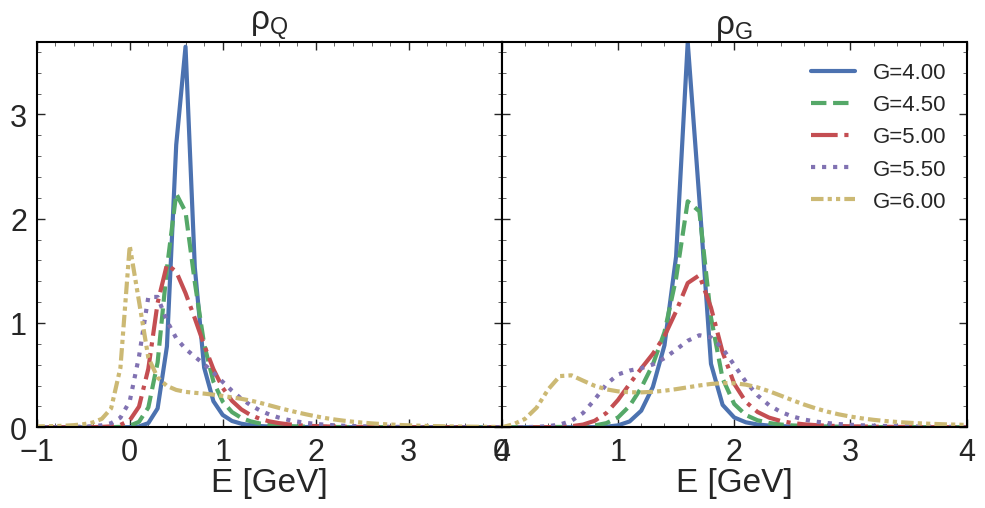

In [14]:
fig, ax = plt.subplots(1,2,figsize=(12,5), sharey='all')
fig.subplots_adjust(wspace=0)
for G, rq, rg, ls in zip(Grange, R_Q, R_G, lss):
    l, = ax[0].plot(erange, rq[:, 0], label='G=%.2f'%G, ls=ls)
    ax[1].plot(erange, rg[:, 0], label='G=%.2f'%G, ls=ls)

ax[0].set_xlim(-1, 4)
ax[1].set_xlim(0, 4)

for _ in ax:
    _.set_xlabel('E [GeV]')
plt.legend(fontsize=16)

ax[1].set_title(r'$\rho_G$')
ax[0].set_title(r'$\rho_Q$')

In [15]:
ch_qa1 = [loadtxt('output/Param_G=%.2fMG=%.2f/'%(G, mG) + 'Q_TM_qa1_T=%.3f.dat'%T, dtype=complex) for G in Grange]
ch_gg1 = [loadtxt('output/Param_G=%.2fMG=%.2f/'%(G, mG) + 'G_TM_gg1_T=%.3f.dat'%T, dtype=complex) for G in Grange]
ch_qq3 = [loadtxt('output/Param_G=%.2fMG=%.2f/'%(G, mG) + 'Q_TM_qq3_T=%.3f.dat'%T, dtype=complex) for G in Grange]


Text(0.5, 1.0, '$qq_3$')

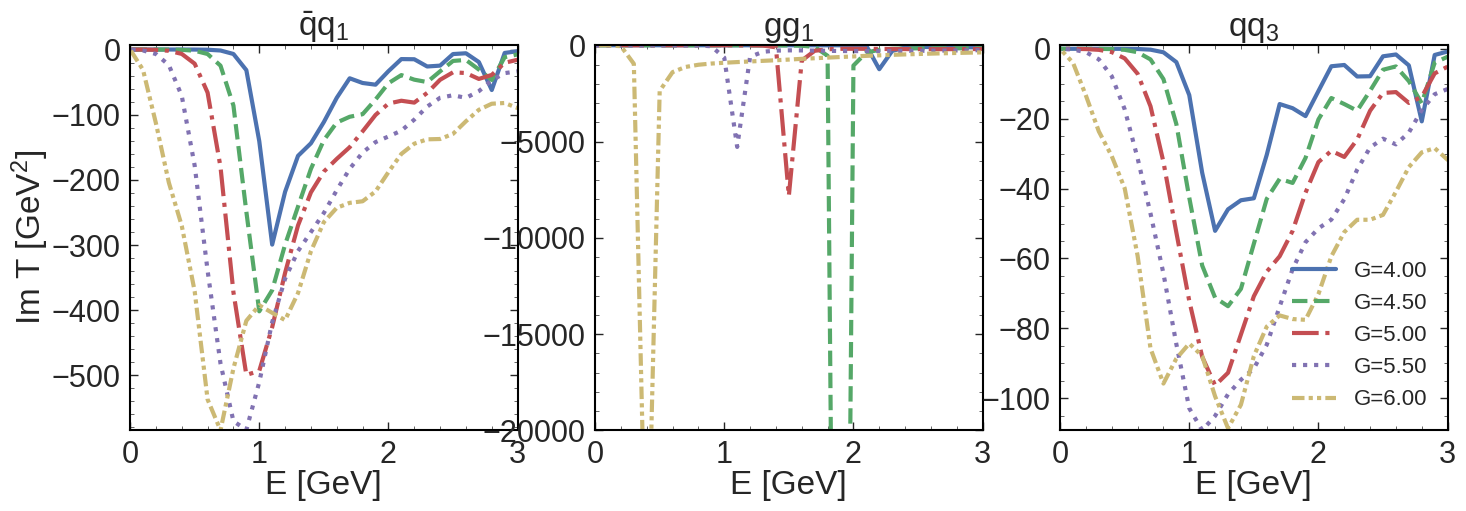

In [16]:
fig, ax = plt.subplots(1,3,figsize=(17,5))
# fig.subplots_adjust(wspace=0)
for G, qa1, gg1, qq3, ls in zip(Grange, ch_qa1, ch_gg1, ch_qq3, lss):
    l, = ax[0].plot(erange, imag(qa1[:, 0]), label='G=%.2f'%G, ls=ls)
    ax[1].plot(erange, imag(gg1[:, 0]), label='G=%.2f'%G, ls=ls)
    ax[2].plot(erange, imag(qq3[:, 0]), label='G=%.2f'%G, ls=ls)

ax[0].set_xlim(0,3)
ax[1].set_xlim(0, 3)
ax[2].set_xlim(0, 3)

ax[1].set_ylim(-20000, 0)
for _ in ax:
    _.set_xlabel('E [GeV]')
plt.legend(fontsize=16)

ax[0].set_ylabel('Im T [GeV$^2$]')

ax[0].set_title(r'$\bar q q_1$')
ax[1].set_title(r'$gg_1$')
ax[2].set_title(r'$qq_3$')

